In [159]:
import os
import sys
import json

data_files = os.listdir('.')

files = {'_ant-colony-AT-our-set.txt', '_greedy-our-set.txt'}

data_files = [f for f in data_files if f in files]

data_set = 'our_set'

print(data_files)

['_ant-colony-AT-our-set.txt', '_greedy-our-set.txt']


In [160]:
import numpy as np

results = {}
out = {}

dna_lengths = None

if data_set == 'pp_set':
    dna_lengths = ['200', '400', '500', '600']
else:
    dna_lengths = ['50', '100', '200', '400', '600']

for fil in data_files:
    with open(fil, 'r') as f:
        res_values = {}
        tmp = f.readline()
        results[fil] = json.loads(tmp)
        for error_rate in results[fil]['files']:
            files = results[fil]['files'][error_rate]
            res_values[error_rate] = {}

            res_values[error_rate]['global_mean'] = np.mean(np.array([files[f]['quality-needleman'] for f in files]))

            #optimal solutions
            res_values[error_rate]['global_optimal'] = np.sum(np.array([1 for f in files if files[f]['quality-needleman'] ==1]))
            
            res_values[error_rate]['global_size'] = len([f for f in files])

            #for each length
            for l in dna_lengths:
                res_values[error_rate][l] = {}
                res_values[error_rate][l]['mean'] = np.mean(np.array([files[f]['quality-needleman'] for f in files if f[:3] == l or f[:2] == l]))
                res_values[error_rate][l]['optimal'] = np.sum(np.array([1 for f in files if files[f]['quality-needleman'] ==1 and (f[:3] == l or f[:2] == l)]))
                res_values[error_rate][l]['size'] = len([f for f in files if f[:3] == l])

        out[fil] = res_values

out

{'_ant-colony-AT-our-set.txt': {'5': {'global_mean': 0.9532991240110021,
   'global_optimal': 63,
   'global_size': 125,
   '50': {'mean': 0.9117613627874479, 'optimal': 10, 'size': 0},
   '100': {'mean': 0.9330938453792575, 'optimal': 4, 'size': 25},
   '200': {'mean': 0.9647628637417992, 'optimal': 2, 'size': 25},
   '400': {'mean': 0.9830937914812153, 'optimal': 24, 'size': 25},
   '600': {'mean': 0.9737837566652913, 'optimal': 23, 'size': 25}},
  '10': {'global_mean': 0.937052906055697,
   'global_optimal': 45,
   'global_size': 125,
   '50': {'mean': 0.8939551628127222, 'optimal': 5, 'size': 0},
   '100': {'mean': 0.929205014183596, 'optimal': 1, 'size': 25},
   '200': {'mean': 0.96698329248416, 'optimal': 1, 'size': 25},
   '400': {'mean': 0.9628594743458541, 'optimal': 21, 'size': 25},
   '600': {'mean': 0.9322615864521521, 'optimal': 17, 'size': 25}},
  '20': {'global_mean': 0.9332544841644582,
   'global_optimal': 47,
   'global_size': 125,
   '50': {'mean': 0.8761737351188396

In [161]:
#liczba optymalnych
for f in files:
    print(files)

TAGCGAATCTGTTAAATAATAATGTCGTACTTACGGTGTAAAGGCTTCCGTCTCTAGCGCGCC', 'quality': 0.565, 'quality-needleman': 0.7316666666666667}, '600_12': {'target sequence': 'TTATTTACAGCGGGTTTGTGGCCGACGCTTGAACGAGAACTAGCACTGCCCTATGGTCTAAGACGCGCGTTTTGTTCTCGGCTAACGTATTCCTGGCAACAATCGTTAGTTAAAGTCTATCCCGGTATCCTACATCGCAAGATAGGGGGCCACAGTGACTACAAACCGATGCCAGGAAGTAACTATCCTCGGCATCGCATGGCTGGTTGTGGTGTCTTGCGCTTTTTTAGTCCATCTGGTTTGATCTCTCTCGGTACTTCACTCTGTATGGCTTACGGTTGGCCACTTTACAGTGATATGTCGCTGACCTAATCTTAGAAATTTACCCCGCACCTGTGTTCGTATAAGGAAGTTACCACTGGAAAGATCACTTACGGAGCCCAGGACATGCACACTCGGTGGGCCGTATTCTTTAAGAGGATCACTGGTGCGAACCTTACACATTGACTTGTAGCCAAGCAATCCATTAAAATCGACGGGCGTTTGCCTGCTATTCCTAATACAAAGGAATGCCCCACCGACAGAAGTTCGGACAATCTTACTATCATGTACCCCTGTTTTGCTCCTCGCTGACGAAAGTCAGTTATCAACACCAACCGA', 'n': 600, 'l': 121, 'time': 0.6960246562957764, 'oligo used': 456, 'output length': 600, 'output sequence': 'TTATTTACAGCGGGTTTGTGGCCGACGCTTGAACGAGAACTAGCACTGCCCTATGGTCTAAGACGCGCGTTTTGTTCTCGGCTAACGTATTCCTGGCAACAATCGTTAGTTAAAGTCTATCCCGGTATCCT

In [162]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True
params = {'text.latex.preamble': r'\usepackage[T1]{fontenc}'}
plt.rcParams.update(params)
colMarkers = ['bo', 'gv','md', 'rD', 'ks', 'y*']

def plot_results(x_series, y_series, legendNames = None, xLabel='', yLabel='', xTicks=None, limits=None, title=None, _loc=None):
    
    __plot = plt.figure()
    a1 = __plot.add_axes([0, 0, 1, 1])

    # ax.tick_params(axis='x', labelsize=20)
    j = 0
    for x_s, y_s in zip(x_series, y_series):
        a1.plot(x_s, y_s, str(colMarkers[j][0] + '-'))
        j += 1

        #legend
    a1.legend(labels = legendNames, loc = _loc, fontsize=16)
    a1.set_xlabel(xLabel, fontsize = 17)
    
    a1.set_ylabel(yLabel, fontsize = 17)
    #grid
    a1.grid(color = 'k', ls = ':')
    #limits
    if limits is None:
        y_min = min([min(ser) for ser in y_series])
        y_max = max([max(ser) for ser in y_series])
        x_min = min([min(ser) for ser in x_series])
        x_max = max([max(ser) for ser in x_series])
    else:
        y_min = limits[2]
        y_max = limits[3]
        x_min = limits[0]
        x_max = limits[1]
    a1.set_ylim(y_min, y_max)
    a1.set_xlim(x_min, x_max)
    if title is not None:
        a1.set_title(title, fontsize=20)
    if xTicks is not None:
        a1.set_xticks(xTicks)
    #ticks
    
    a1.tick_params(direction = 'in')
    

    return __plot

# tmp = plot_results([[1,2,3], [1,2,3]], [[1,2,3], [3,2,3]], xTicks=[1,2,3], legendNames=['s', 't'])
# plt.show()


_ant-colony-AT-our-set.txt
_greedy-our-set.txt


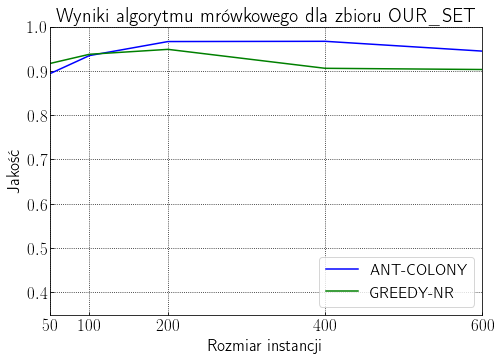

In [163]:
x_ser = []
y_ser = []

x_tic = [int(v) for v in dna_lengths]
lims = [min([int(l) for l in dna_lengths]), max([int(l) for l in dna_lengths]), 0.35, 1]

legend_names = []

for res in out:
    print(res)
    legend_names.append(res[1:-4].upper())
    tmp = [0] * len(dna_lengths)
    for err in out[res]:
        for i in range(len(dna_lengths)):
            tmp[i] += out[res][err][dna_lengths[i]]['mean']
    for i in range(len(tmp)):
        tmp[i] /= 3
    y_ser.append(tmp)

x_ser.append([int(v) for v in dna_lengths])
x_ser = x_ser * len(y_ser)

legend_names = ['ANT-COLONY', 'GREEDY-NR']

tmp = plot_results(
    x_series=x_ser,
    y_series=y_ser,
    legendNames=legend_names,
    xLabel=r'Rozmiar instancji',
    yLabel=r'Jakość',
    xTicks=x_tic,
    limits=lims, title=r'Wyniki algorytmu mrówkowego dla zbioru OUR\_SET', _loc='lower right'
)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

tmp.savefig('ant_colony_greedy_our_set',dpi=150, bbox_inches='tight', pad_inches=0.1)

{'_ant-colony-AT-our-set.txt': {50: 17, 100: 9, 200: 6, 400: 67, 600: 56}, '_greedy-our-set.txt': {50: 13, 100: 17, 200: 9, 400: 31, 600: 38}}
['ANT-COLONY', 'GREEDY-NR']
[[50, 100, 200, 400, 600], [50, 100, 200, 400, 600]]
[[17, 9, 6, 67, 56], [13, 17, 9, 31, 38]]


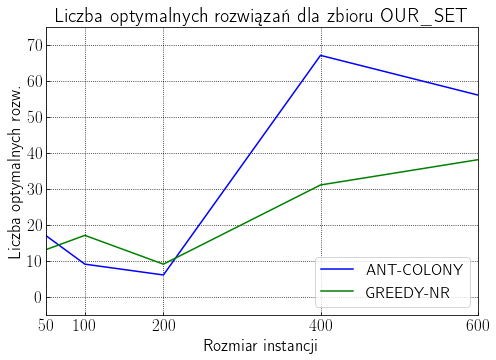

In [164]:
#number of optimal solutions found
optimal = {}

for f in out:
    optimal[f] = {}
    for error_rate in out[f]:
        for item in out[f][error_rate]:
            try:
                l = int(item)
                try:
                    optimal[f][l] += out[f][error_rate][item]['optimal']
                except KeyError:
                    optimal[f][l] = out[f][error_rate][item]['optimal']
            except:
                continue

print(optimal)

x_ser = []
y_ser = []

y_upper = None
if data_set == 'pp_set':
    y_upper = 120
else:
    y_upper = 75
lims = [min([int(l) for l in dna_lengths]), max([int(l) for l in dna_lengths]), -5, y_upper]

for f in optimal:
    x_ser.append([l for l in optimal[f]])
    y_ser.append([optimal[f][l] for l in optimal[f]])

print(legend_names)
print(x_ser)
print(y_ser)

tmp = plot_results(
    x_series=x_ser,
    y_series=y_ser,
    legendNames=legend_names,
    xLabel=r'Rozmiar instancji',
    yLabel=r'Liczba optymalnych rozw.',
    xTicks=x_tic,
    limits=lims, title=u'Liczba optymalnych rozwiązań dla zbioru OUR\_SET', _loc='lower right'
)


plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
tmp.savefig('ant_colony_greedy_optimal_our_set', pad_inches=0.1, bbox_inches='tight', dpi=150)
plt.show()

In [165]:
import json

with open('_aco_tuning_results_v2.txt', 'r') as f:
    aco_tun_results = f.read()

    aco_tun_results = json.loads(aco_tun_results)

    results = [(i, aco_tun_results[i]['quality']) for i in aco_tun_results]

    results = sorted(results, key=lambda it: it[1])

    for i in range(min(10, len(results))):
        print(results[-1 - i][0], results[-1 - i][1], aco_tun_results[
            results[-1 - i][0]
        ])
    print('================================')
    for i in range(min(10, len(results))):
        print(results[i][0], results[i][1], aco_tun_results[results[i][0]])


4 0.8230329882993921 {'nf': 4, 'nb': 0, 'rcl_card': 5, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8230329882993921}
8 0.8175428222896265 {'nf': 8, 'nb': 0, 'rcl_card': 7, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8175428222896265}
2 0.8142097472767759 {'nf': 8, 'nb': 0, 'rcl_card': 3, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8142097472767759}
6 0.8111364145640174 {'nf': 2, 'nb': 0, 'rcl_card': 7, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, 'kbs': 0.3, 'max duration': 5, 'conv threshold': 0.9999, 'determinism rate': 0.95, 'init det. rate': 1, 'quality': 0.8111364145640174}
5 0.807703620081418 {'nf': 8, 'nb': 0, 'rcl_card': 5, 'rho': 0.01, 'kib': 0.3, 'krb': 0.3, '

[[0.83168255 0.87275396 0.86760711 0.87170676]
 [0.79657397 0.80349986 0.81691567 0.8667824 ]
 [0.75846879 0.77627087 0.8036304  0.86049773]
 [0.73510667 0.77364432 0.81591888 0.85348219]]


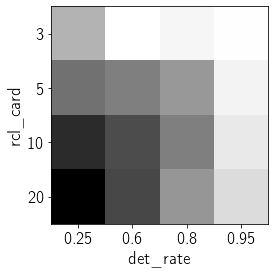

In [166]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as nr
import numpy as np
import json

with open('_det_corr2.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    x_label = 'det. rate list'
    y_label = 'rcl card'

    x_item = 'determinism rate'
    y_item = 'rcl_card'

    x_axis = res[x_label]
    y_axis = res[y_label]

    quality_name = 'quality'

    quilt = np.zeros((len(y_axis), len(x_axis)))
    for it in res["iterations"]:
        try:
            i = int(it)
        
            quilt[
                y_axis.index(res["iterations"][it][y_item])
            ][
                x_axis.index(res["iterations"][it][x_item])
            ] = res["iterations"][it][quality_name]
        except ValueError:
            continue

    print(quilt)
    fig, ax = plt.subplots(1,1)
    
    img = ax.imshow(quilt, interpolation='none', aspect='equal', cmap='gray')
    ax.set_xticks([i for i in range(np.shape(quilt)[1])])
    ax.set_xticklabels(x_axis)
    
    ax.set_yticks([i for i in range(np.shape(quilt)[0])])
    ax.set_yticklabels(y_axis)
    ax.set_ylabel(r'rcl\_card', fontsize=18)
    ax.set_xlabel(r'det\_rate', fontsize=18)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)

    # plt.savefig('next_oligo_tuning', dpi=150, pad_inches=0.1, bbox_inches='tight')

    plt.show()

[[0.84419841 0.84835181 0.86208382 0.84439322]
 [0.87509374 0.8630806  0.87155372 0.85290097]
 [0.88625015 0.89490595 0.87494444 0.85022887]
 [0.90128486 0.87589371 0.88382252 0.86135952]]


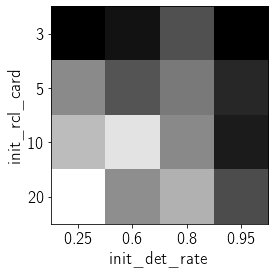

In [167]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as nr
import numpy as np
import json

with open('_init_corr2.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    x_label = 'init det. rate list'
    y_label = 'init rcl card'

    x_item = 'init det. rate'
    y_item = 'init det. card'

    x_axis = res[x_label]
    y_axis = res[y_label]

    quality_name = 'quality'

    quilt = np.zeros((len(y_axis), len(x_axis)))
    for it in res["iterations"]:
        try:
            i = int(it)
        
            quilt[
                y_axis.index(res["iterations"][it][y_item])
            ][
                x_axis.index(res["iterations"][it][x_item])
            ] = res["iterations"][it][quality_name]
        except ValueError:
            continue

    print(quilt)
    fig, ax = plt.subplots(1,1)
    
    img = ax.imshow(quilt, interpolation='none', aspect='equal', cmap='gray')
    ax.set_xticks([i for i in range(np.shape(quilt)[1])])
    ax.set_xticklabels(x_axis)
    
    ax.set_yticks([i for i in range(np.shape(quilt)[0])])
    ax.set_yticklabels(y_axis)
    ax.set_ylabel(r'init\_rcl\_card', fontsize=18)
    ax.set_xlabel(r'init\_det\_rate', fontsize=18)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)

    # plt.savefig('initial_oligo_tuning', dpi=150, pad_inches=0.1, bbox_inches='tight')
    plt.show()

[[0.87280442 0.88421521 0.88344621 0.86005595]
 [0.8735113  0.8711329  0.879471   0.89332372]
 [0.88028476 0.88038138 0.88241165 0.88623431]
 [0.87885614 0.87334431 0.87525764 0.86536923]]


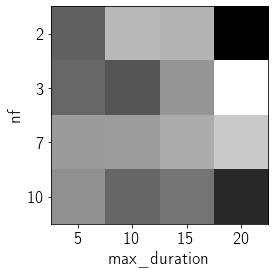

In [168]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.random as nr
import numpy as np
import json

with open('_duration_nf_corr2.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    x_label = 'duration list'
    y_label = 'nf list'

    x_item = 'max duration'
    y_item = 'nf'

    x_axis = [5, 10, 15, 20]
    y_axis = res[y_label]

    quality_name = 'quality'

    quilt = np.zeros((len(y_axis), len(x_axis)))
    for it in res["iterations"]:
        try:
            i = int(it)
        
            quilt[
                y_axis.index(res["iterations"][it][y_item])
            ][
                x_axis.index(res["iterations"][it][x_item])
            ] = res["iterations"][it][quality_name]
        except ValueError:
            continue

    print(quilt)
    fig, ax = plt.subplots(1,1)
    
    img = ax.imshow(quilt, interpolation='none', aspect='equal', cmap='gray')
    ax.set_xticks([i for i in range(np.shape(quilt)[1])])
    ax.set_xticklabels(x_axis)
    
    ax.set_yticks([i for i in range(np.shape(quilt)[0])])
    ax.set_yticklabels(y_axis)
    ax.set_ylabel(r'nf', fontsize=18)
    ax.set_xlabel(r'max\_duration', fontsize=18)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)

    # plt.savefig('nf_duration', dpi=150, pad_inches=0.1, bbox_inches='tight')
    plt.show()

In [169]:
import json

with open('_k_coeff2.txt', 'r') as f:
    res = f.read()
    res = json.loads(res)

    for it in res['iterations']:
        print(res['iterations'][it]['kib'], res['iterations'][it]['krb'], res['iterations'][it]['kbs'], res['iterations'][it]['quality'])

0.2 0.2 0.6 0.893429136737227
0.3 0.3 0.4 0.9027521156540506
0.4 0.4 0.2 0.8921364248456901
0.5 0.3 0.2 0.8945909877541119
0.6 0.3 0.1 0.8983819324819519


In [170]:
from src.solution import solutionQuality
from src.needleman_wunsch import main
from src.usefullFunctions import levenshteinDistance
import random

list_len = 50

l = [''.join([str(random.randint(0, 3)) for i in range(100)]) for j in range(list_len)]

m = 0

for i in range(list_len - 1):
    for j in range(i + 1, list_len):
        m += 1 - levenshteinDistance(l[i], l[j])/ 100

m /= list_len * (list_len - 1) / 2

m

0.44156734693877603

In [171]:
dna_strand = 'ACCTAGACATCGACCTAGCTTTGATC'
found_solution = 'AAAAAAAAAAAATCACCTAGACATCG'

print(1 - levenshteinDistance(dna_strand, found_solution)/ max(len(dna_strand), len(found_solution)))

print(main(dna_strand, found_solution, 1, -1, 0) / max(len(found_solution), len(dna_strand)))

0.42307692307692313
0.6153846153846154
